# TF-IDF + Multiple classifiers

In this notebook we will try to get the embeddings of the texts of IMDB dataset and then use a specific classification technique to classify these reviews into their corresponding sentiment i.e ***Negative*** or ***Positive***.

In [30]:
from tqdm.notebook import tqdm
import pandas as pd
tqdm.pandas()
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import string
from nltk.corpus import stopwords
import xgboost as xgb
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

sw=set(stopwords.words('english'))
snow=SnowballStemmer('english')
from sklearn import metrics
from sklearn import model_selection
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
sns.set(rc={'axes.facecolor':'#FAF7CC',"axes.edgecolor":"black","axes.grid":False,"axes.labelsize":30,"xtick.labelsize":15,"ytick.labelsize":15})

[nltk_data] Downloading package stopwords to /home/dhiab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("./data/IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


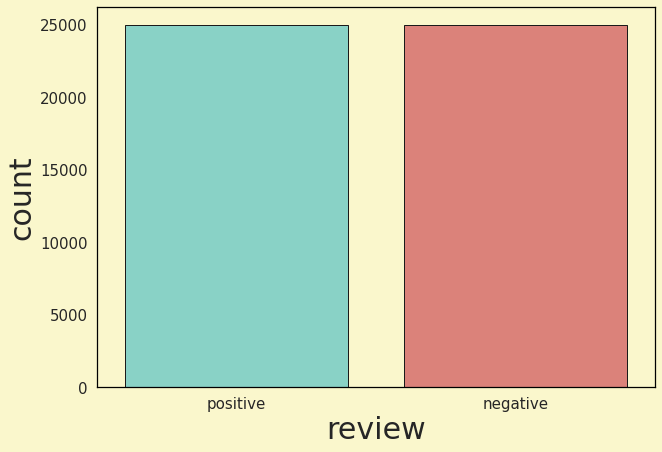

In [3]:
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize = (10, 7),facecolor='#FAF7CC')
sns.countplot(x="sentiment",data=df,palette=["#7DDECE", "#EB746A"],edgecolor="k")
plt.xlabel('review')
plt.show()

In [4]:
#clean text
def clean_text(text):
    #Removing html tags
    soup=BeautifulSoup(text)
    text=soup.get_text()
    #lowercase every letter
    text=text.lower()
    text = text.split() #split by all white spaces
    
    #join tokens by single space, this will remove all kinds of weird spaces
    text = " ".join(text)
    #removes all punctuation using regex and string module
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    text=' '.join([snow.stem(word) for word in text.split() if word not in sw])
    
    return text
df_new=df.copy()
df_new['review'] = df["review"].progress_apply(clean_text)


  0%|          | 0/50000 [00:00<?, ?it/s]

In [19]:
n=np.random.randint(0,len(df),size=1)[0]
print(f'A review example before performing cleaning:\n\n{df.review.iloc[n]}')
print('-'*50)
print(f'A review example after performing cleaning:\n\n{df_new.review.iloc[n]}')

A review example before performing cleaning:

I am a big fan of cinema verite and saw this movie because I heard how interesting it was. I can honestly say it was very interesting indeed. The two lead actors are awesome, the film isn't ever boring, and the concept behind it (though obviously inspired by the Columbine killings and the home movies of the killers) is really interesting. There are some weaknesses, such as the final 20 minutes which really detracts from the realism seen in the first hour or so and the ending really doesn't make any sense at all. The shaky camera sometimes can be a distraction, but in cinema verite that is a given. But I still think the movie is very well done and the director Ben Coccio deserves some credit.
--------------------------------------------------
A review example after performing cleaning:

big fan cinema verit saw movi heard interest honest say interest inde two lead actor awesom film isnt ever bore concept behind though obvious inspir columbin

In [20]:
df_new['sentiment'] = df_new['sentiment'].progress_apply(lambda x: 1 if x=='positive' else 0)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [123]:
# Generate a word cloud image for positive reviews
mask=np.array(Image.open("./data/positive.jpg"))
mask=np.where(mask>230,255,mask)
pos_text=" ".join(review for review in df_new[df_new["sentiment"]==1].review)
wordcloud_pos = WordCloud( mode="RGBA", max_words=1000,mask=mask,background_color="white").generate(pos_text)
image_colors = ImageColorGenerator(mask);
res=wordcloud_pos.recolor(color_func=image_colors)

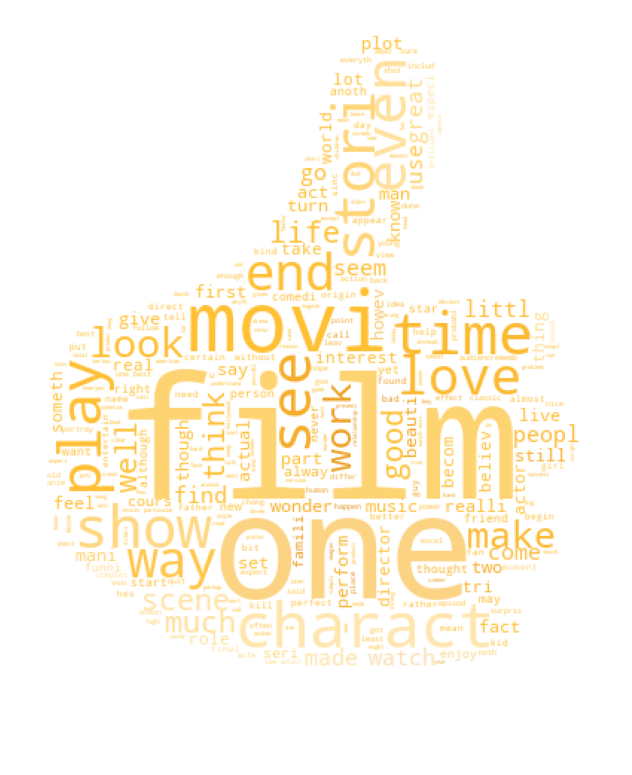

In [132]:
plt.figure(figsize=[14,14])
plt.imshow(res, interpolation="kaiser");
plt.axis("off")
plt.savefig('positive_cloud.png')
plt.show()

In [129]:
# Generate a word cloud image for negative reviews
mask = np.array(Image.open("./data/negative.png"))
mask=np.where(mask>230,255,mask)
neg_text=" ".join(review for review in df_new[df_new["sentiment"]==0].review)
wordcloud_neg = WordCloud( mode="RGBA", max_words=10000, mask=mask,background_color="white").generate(neg_text)
image_colors = ImageColorGenerator(mask);
res_neg=wordcloud_neg.recolor(color_func=image_colors)

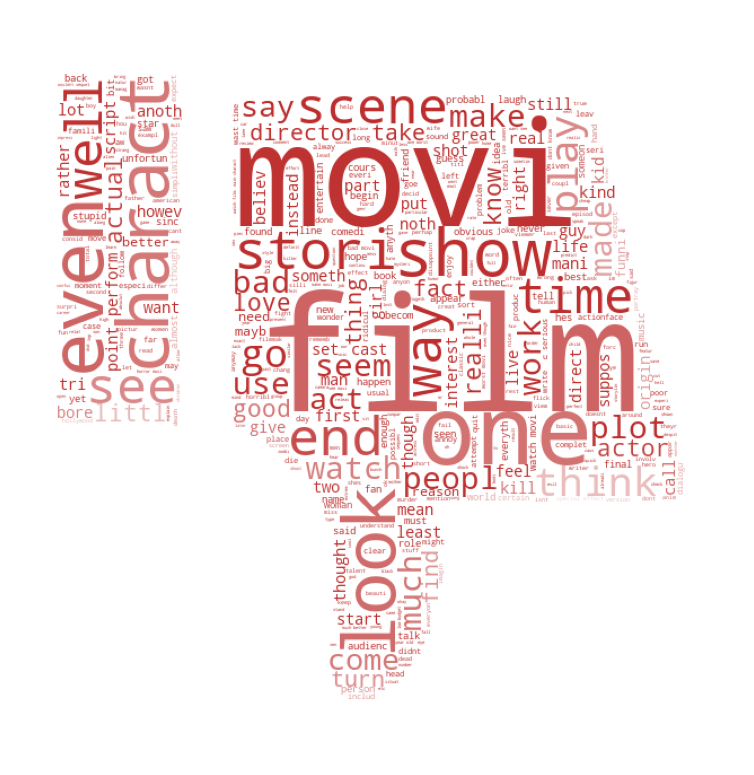

In [133]:
plt.figure(figsize=[14,14])
plt.imshow(res_neg, interpolation="kaiser");
plt.axis("off")
plt.savefig("negative_cloud.png")
plt.show()